In [122]:
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow.keras.layers import Lambda,Dense,LSTM,Embedding
from tensorflow.keras import Input
from tensorflow.keras.models import Model,Sequential
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import TruncatedSVD
from sklearn.model_selection import train_test_split
from tensorflow.keras.optimizers import Adam

In [2]:
databbc = pd.read_csv('https://github.com/dicodingacademy/assets/raw/main/Simulation/machine_learning/bbc-text.csv')

In [3]:
databbc.head()

,category,text
0,tech,tv future in the hands of viewers with home th...
1,business,worldcom boss left books alone former worldc...
2,sport,tigers wary of farrell gamble leicester say ...
3,sport,yeading face newcastle in fa cup premiership s...
4,entertainment,ocean s twelve raids box office ocean s twelve...


In [4]:
X_trainNotTokenized,X_testNotTokenized,y_trainNotTokenized,y_testNotTokenized = train_test_split(databbc.text,
                                                                                                 databbc.category,
                                                                                                 test_size=0.2,
                                                                                                 random_state=0)

In [5]:
vocab_size = 1000
maxlen=120
oov_tok = '<oov>'
padding = 'post'
trunc= 'post'
embedding_dim = 128

In [6]:
tokenizer = Tokenizer(num_words=vocab_size,oov_token=oov_tok,)

In [7]:
tokenizer.fit_on_texts(X_trainNotTokenized)

In [8]:
X_trainTokenized = tokenizer.texts_to_sequences(X_trainNotTokenized)
X_testTokenized = tokenizer.texts_to_sequences(X_testNotTokenized)

In [9]:
X_trainPad = pad_sequences(X_trainTokenized,maxlen=maxlen,padding=padding,truncating=trunc)
X_testPad = pad_sequences(X_testTokenized,maxlen=maxlen,padding=padding,truncating=trunc)

In [10]:
X_trainPad.shape

(1780, 120)

In [11]:
X_testPad.shape

(445, 120)

In [12]:
databbc.category.unique().shape[0]

5

In [13]:
labelTokenize = Tokenizer(num_words=databbc.category.unique().shape[0]+1)

In [14]:
labelTokenize.fit_on_texts(np.hstack((y_trainNotTokenized.values,y_testNotTokenized.values)))

In [15]:
y_train = np.array(labelTokenize.texts_to_sequences(y_trainNotTokenized))-1
y_test = np.array(labelTokenize.texts_to_sequences(y_testNotTokenized))-1

In [16]:
y_train.shape

(1780, 1)

In [17]:
y_test.shape

(445, 1)

embedding only

In [18]:
model = Sequential([
    Input(shape=(maxlen)),
    Embedding(vocab_size,embedding_dim,mask_zero=True,input_length=maxlen),
    LSTM(100),
    Dense(5,activation='softmax')
])
model.compile(
    optimizer= Adam(),
    loss='sparse_categorical_crossentropy',
    metrics='accuracy'
)


In [19]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 120, 128)          128000    
                                                                 
 lstm (LSTM)                 (None, 100)               91600     
                                                                 
 dense (Dense)               (None, 5)                 505       
                                                                 
Total params: 220,105
Trainable params: 220,105
Non-trainable params: 0
_________________________________________________________________


In [20]:
model.fit(
    X_trainPad,
    y_train,
    batch_size=32,
    epochs=50,
    validation_data=(X_testPad,y_test)
)

Epoch 1/50
56/56 [==============================] - 28s 83ms/step - loss: 1.5348 - accuracy: 0.2882 - val_loss: 1.3225 - val_accuracy: 0.3685
Epoch 2/50
56/56 [==============================] - 1s 13ms/step - loss: 1.1708 - accuracy: 0.4365 - val_loss: 1.0550 - val_accuracy: 0.4966
Epoch 3/50
56/56 [==============================] - 1s 11ms/step - loss: 1.0612 - accuracy: 0.4904 - val_loss: 0.9915 - val_accuracy: 0.4562
Epoch 4/50
56/56 [==============================] - 1s 12ms/step - loss: 0.9656 - accuracy: 0.5219 - val_loss: 0.9255 - val_accuracy: 0.5416
Epoch 5/50
56/56 [==============================] - 1s 11ms/step - loss: 0.7470 - accuracy: 0.6764 - val_loss: 0.6694 - val_accuracy: 0.6989
Epoch 6/50
56/56 [==============================] - 1s 11ms/step - loss: 0.6271 - accuracy: 0.7691 - val_loss: 0.7790 - val_accuracy: 0.7551
Epoch 7/50
56/56 [==============================] - 1s 11ms/step - loss: 0.5037 - accuracy: 0.8258 - val_loss: 0.5740 - val_accuracy: 0.8472
Epoch 8/50
5

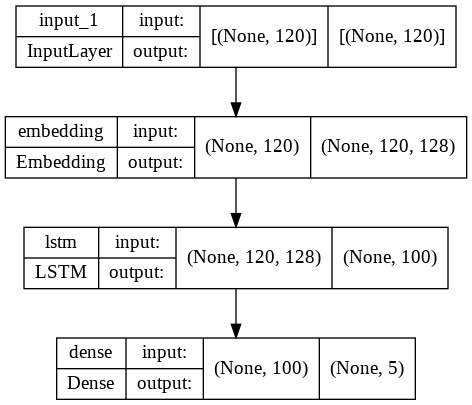

In [129]:
tf.keras.utils.plot_model(
    model,                 
    to_file='Embedding Only.png',
    dpi=96,              
    show_shapes=True, 
    show_layer_names=True, 
    expand_nested=False                      
)

TFIDF + Dense

In [21]:
tfidf = TfidfVectorizer(stop_words='english',max_features=embedding_dim)

In [22]:
X_trainTfIdf = tfidf.fit_transform(X_trainNotTokenized)

In [23]:
X_testTfIdf = tfidf.transform(X_testNotTokenized)

In [24]:
X_trainTfIdf = X_trainTfIdf.todense()

In [25]:
X_testTfIdf = X_testTfIdf.todense()

In [26]:
X_testTfIdf.shape

(445, 128)

In [27]:
X_trainTfIdf

matrix([[0.        , 0.        , 0.        , ..., 0.        , 0.07645456,
         0.        ],
        [0.41062255, 0.        , 0.        , ..., 0.        , 0.13275242,
         0.        ],
        [0.        , 0.09798981, 0.        , ..., 0.        , 0.        ,
         0.        ],
        ...,
        [0.        , 0.        , 0.        , ..., 0.        , 0.03738033,
         0.        ],
        [0.        , 0.23423384, 0.        , ..., 0.1947837 , 0.14397213,
         0.19445441],
        [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
         0.        ]])

In [28]:
modelTfIDf = Sequential([
  Input((128)),
  Dense(128),
  Dense(5,activation='softmax')
])
modelTfIDf.compile(
    optimizer=Adam(),
    loss='sparse_categorical_crossentropy',
    metrics='accuracy'
)


In [29]:
modelTfIDf.fit(
    X_trainTfIdf,
    y_train,
    epochs=50,
    batch_size=32,
    validation_data=(X_testTfIdf,y_test)
)

Epoch 1/50
56/56 [==============================] - 1s 5ms/step - loss: 1.3313 - accuracy: 0.6483 - val_loss: 0.9988 - val_accuracy: 0.8584
Epoch 2/50
56/56 [==============================] - 0s 3ms/step - loss: 0.7767 - accuracy: 0.8719 - val_loss: 0.5485 - val_accuracy: 0.8989
Epoch 3/50
56/56 [==============================] - 0s 4ms/step - loss: 0.4685 - accuracy: 0.9096 - val_loss: 0.3562 - val_accuracy: 0.9191
Epoch 4/50
56/56 [==============================] - 0s 4ms/step - loss: 0.3375 - accuracy: 0.9236 - val_loss: 0.2820 - val_accuracy: 0.9213
Epoch 5/50
56/56 [==============================] - 0s 3ms/step - loss: 0.2740 - accuracy: 0.9309 - val_loss: 0.2486 - val_accuracy: 0.9326
Epoch 6/50
56/56 [==============================] - 0s 4ms/step - loss: 0.2370 - accuracy: 0.9399 - val_loss: 0.2288 - val_accuracy: 0.9258
Epoch 7/50
56/56 [==============================] - 0s 4ms/step - loss: 0.2109 - accuracy: 0.9449 - val_loss: 0.2229 - val_accuracy: 0.9258
Epoch 8/50
56/56 [==

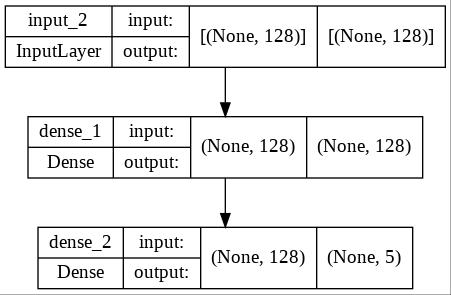

In [133]:
tf.keras.utils.plot_model(
    modelTfIDf,
    to_file='TFIDF+Dense.jpg',
    dpi=96,
    show_shapes=True,
    show_layer_names=True
)

TFIDF + LSTM but only 1 step

In [30]:
X_trainTfIdfForLstm = tf.expand_dims(X_trainTfIdf,axis=1)

In [31]:
X_testTfIdfForLstm = tf.expand_dims(X_testTfIdf,axis=1)

In [32]:
modelTfIdfLSTM = Sequential([
    Input((1,128)),
    LSTM(100),
    Dense(5,activation='softmax')
])
modelTfIdfLSTM.compile(
    optimizer=Adam(),
    loss='sparse_categorical_crossentropy',
    metrics='accuracy'
)

In [33]:
modelTfIdfLSTM.fit(
    X_trainTfIdfForLstm,
    y_train,
    batch_size=32,
    epochs=50,
    validation_data = (X_testTfIdfForLstm,y_test)
)

Epoch 1/50
56/56 [==============================] - 2s 15ms/step - loss: 1.5201 - accuracy: 0.6669 - val_loss: 1.3954 - val_accuracy: 0.7685
Epoch 2/50
56/56 [==============================] - 0s 4ms/step - loss: 1.2056 - accuracy: 0.7876 - val_loss: 0.9450 - val_accuracy: 0.8427
Epoch 3/50
56/56 [==============================] - 0s 4ms/step - loss: 0.7381 - accuracy: 0.8697 - val_loss: 0.5154 - val_accuracy: 0.9101
Epoch 4/50
56/56 [==============================] - 0s 4ms/step - loss: 0.4383 - accuracy: 0.9163 - val_loss: 0.3342 - val_accuracy: 0.9236
Epoch 5/50
56/56 [==============================] - 0s 4ms/step - loss: 0.3159 - accuracy: 0.9287 - val_loss: 0.2678 - val_accuracy: 0.9213
Epoch 6/50
56/56 [==============================] - 0s 5ms/step - loss: 0.2580 - accuracy: 0.9343 - val_loss: 0.2407 - val_accuracy: 0.9258
Epoch 7/50
56/56 [==============================] - 0s 4ms/step - loss: 0.2242 - accuracy: 0.9438 - val_loss: 0.2224 - val_accuracy: 0.9281
Epoch 8/50
56/56 [=

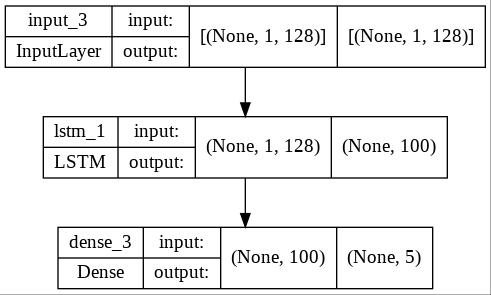

In [134]:
tf.keras.utils.plot_model(
    modelTfIdfLSTM,
    to_file='TFIDF + LSTM but only 1 step.jpg',
    dpi=96,
    show_shapes=True,
    show_layer_names=True
)

TFIDF + LSTM with many step

In [34]:
X_trainTfIdfForLstmManyCell = tf.expand_dims(X_trainTfIdf,axis=-1)

In [35]:
X_testTfIdfForLstmManyCell = tf.expand_dims(X_testTfIdf,axis=-1)

In [36]:
modelTfIdfLSTMManyCell = Sequential([
    Input((128,1)),
    LSTM(100),
    Dense(5,activation='softmax')
])
modelTfIdfLSTMManyCell.compile(
    optimizer=Adam(),
    loss='sparse_categorical_crossentropy',
    metrics='accuracy'
)

In [37]:
modelTfIdfLSTMManyCell.fit(
    X_trainTfIdfForLstmManyCell,
    y_train,
    batch_size=32,
    epochs=50,
    validation_data = (X_testTfIdfForLstmManyCell,y_test)
)

Epoch 1/50
56/56 [==============================] - 2s 18ms/step - loss: 1.5977 - accuracy: 0.2691 - val_loss: 1.5715 - val_accuracy: 0.3169
Epoch 2/50
56/56 [==============================] - 0s 8ms/step - loss: 1.5678 - accuracy: 0.3039 - val_loss: 1.5683 - val_accuracy: 0.3551
Epoch 3/50
56/56 [==============================] - 0s 8ms/step - loss: 1.5589 - accuracy: 0.3427 - val_loss: 1.5258 - val_accuracy: 0.3663
Epoch 4/50
56/56 [==============================] - 0s 8ms/step - loss: 1.5069 - accuracy: 0.3573 - val_loss: 1.5012 - val_accuracy: 0.3438
Epoch 5/50
56/56 [==============================] - 0s 8ms/step - loss: 1.4904 - accuracy: 0.3579 - val_loss: 1.4560 - val_accuracy: 0.4112
Epoch 6/50
56/56 [==============================] - 0s 8ms/step - loss: 1.4422 - accuracy: 0.3893 - val_loss: 1.3896 - val_accuracy: 0.4382
Epoch 7/50
56/56 [==============================] - 0s 8ms/step - loss: 1.4265 - accuracy: 0.4073 - val_loss: 1.5280 - val_accuracy: 0.3708
Epoch 8/50
56/56 [=

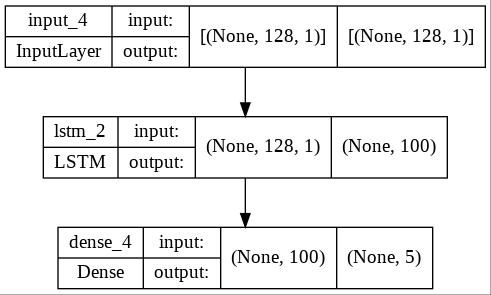

In [135]:
tf.keras.utils.plot_model(
    modelTfIdfLSTMManyCell,
    to_file='TFIDF + LSTM with many step.jpg',
    dpi=96,
    show_shapes=True,
    show_layer_names=True
)

Embedding concat tfidf then feed to LSTM

In [38]:
model.layers

In [39]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 120, 128)          128000    
                                                                 
 lstm (LSTM)                 (None, 100)               91600     
                                                                 
 dense (Dense)               (None, 5)                 505       
                                                                 
Total params: 220,105
Trainable params: 220,105
Non-trainable params: 0
_________________________________________________________________


In [40]:
modelEmbedding = Model(inputs=model.inputs,outputs = model.layers[0].output)

In [41]:
modelEmbedding.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 120)]             0         
                                                                 
 embedding (Embedding)       (None, 120, 128)          128000    
                                                                 
Total params: 128,000
Trainable params: 128,000
Non-trainable params: 0
_________________________________________________________________


In [42]:
inputTokenizer = Input(shape = (maxlen))
inputTfIdf = Input(shape = (embedding_dim))
embed = Embedding(vocab_size,embedding_dim,mask_zero=True,input_length=maxlen)(inputTokenizer)
lambdaLayer = Lambda(lambda x: tf.concat([x[0],tf.expand_dims(x[1],axis=1)],1))([embed,inputTfIdf])
lstm = LSTM(100)(lambdaLayer)
out = Dense(5,activation='softmax')(lstm)
modelEmbedAndTf = Model(inputs=[inputTokenizer,inputTfIdf],outputs=out)

In [43]:
modelEmbedAndTf.summary()

Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_5 (InputLayer)           [(None, 120)]        0           []                               
                                                                                                  
 embedding_1 (Embedding)        (None, 120, 128)     128000      ['input_5[0][0]']                
                                                                                                  
 input_6 (InputLayer)           [(None, 128)]        0           []                               
                                                                                                  
 lambda (Lambda)                (None, 121, 128)     0           ['embedding_1[0][0]',            
                                                                  'input_6[0][0]']          

In [44]:
modelEmbedAndTf.compile(
    optimizer='Adam',
    loss='sparse_categorical_crossentropy',
    metrics='accuracy'
)

In [45]:
modelEmbedAndTf.fit(
    [X_trainPad,X_trainTfIdf],
    y_train,
    epochs=50,
    batch_size=32,
    validation_data=([X_testPad,X_testTfIdf],y_test)
)

Epoch 1/50
56/56 [==============================] - 3s 29ms/step - loss: 1.4719 - accuracy: 0.4343 - val_loss: 1.3066 - val_accuracy: 0.5753
Epoch 2/50
56/56 [==============================] - 1s 9ms/step - loss: 0.9971 - accuracy: 0.6388 - val_loss: 0.8830 - val_accuracy: 0.6831
Epoch 3/50
56/56 [==============================] - 1s 9ms/step - loss: 0.6515 - accuracy: 0.7927 - val_loss: 0.5450 - val_accuracy: 0.8629
Epoch 4/50
56/56 [==============================] - 1s 9ms/step - loss: 0.3984 - accuracy: 0.8882 - val_loss: 0.5200 - val_accuracy: 0.8000
Epoch 5/50
56/56 [==============================] - 1s 9ms/step - loss: 0.3065 - accuracy: 0.9230 - val_loss: 0.3640 - val_accuracy: 0.8854
Epoch 6/50
56/56 [==============================] - 1s 10ms/step - loss: 0.2721 - accuracy: 0.9208 - val_loss: 0.5316 - val_accuracy: 0.8022
Epoch 7/50
56/56 [==============================] - 1s 9ms/step - loss: 0.2629 - accuracy: 0.9315 - val_loss: 0.4382 - val_accuracy: 0.8854
Epoch 8/50
56/56 [

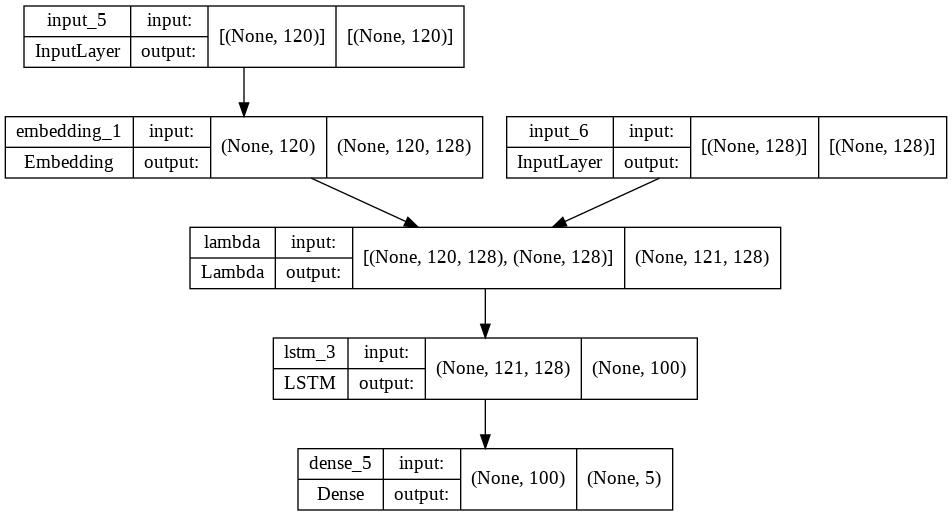

In [137]:
tf.keras.utils.plot_model(
    modelEmbedAndTf,
    to_file='Embedding concat tfidf then feed to LSTM.jpg',
    dpi=96,
    show_shapes=True,
    show_layer_names=True
)

LSTM then concat with TFIDF

In [46]:
inputTokenizer = Input(shape = (maxlen))
inputTfIdf = Input(shape = (embedding_dim))
embed = Embedding(vocab_size,embedding_dim,mask_zero=True,input_length=maxlen)(inputTokenizer)
lstm = LSTM(100)(embed)
lambdaLayer = Lambda(lambda x: tf.concat([x[0],x[1]],1))([lstm,inputTfIdf])
out = Dense(5,activation='softmax')(lambdaLayer)
modelEmbedAndTfExpandLSTM = Model(inputs=[inputTokenizer,inputTfIdf],outputs=out)

In [47]:
modelEmbedAndTfExpandLSTM.compile(
    optimizer='Adam',
    loss='sparse_categorical_crossentropy',
    metrics='accuracy'
)

In [48]:
modelEmbedAndTfExpandLSTM.fit(
    [X_trainPad,X_trainTfIdf],
    y_train,
    epochs=50,
    batch_size=32,
    validation_data=([X_testPad,X_testTfIdf],y_test)
)

Epoch 1/50
56/56 [==============================] - 6s 36ms/step - loss: 1.5389 - accuracy: 0.3758 - val_loss: 1.4308 - val_accuracy: 0.3753
Epoch 2/50
56/56 [==============================] - 1s 12ms/step - loss: 1.2430 - accuracy: 0.5388 - val_loss: 1.1400 - val_accuracy: 0.5169
Epoch 3/50
56/56 [==============================] - 1s 12ms/step - loss: 1.3373 - accuracy: 0.5820 - val_loss: 1.3030 - val_accuracy: 0.6360
Epoch 4/50
56/56 [==============================] - 1s 11ms/step - loss: 1.2706 - accuracy: 0.5758 - val_loss: 1.2676 - val_accuracy: 0.7775
Epoch 5/50
56/56 [==============================] - 1s 11ms/step - loss: 1.1557 - accuracy: 0.7607 - val_loss: 1.0211 - val_accuracy: 0.6899
Epoch 6/50
56/56 [==============================] - 1s 12ms/step - loss: 0.9208 - accuracy: 0.7725 - val_loss: 0.8392 - val_accuracy: 0.7798
Epoch 7/50
56/56 [==============================] - 1s 12ms/step - loss: 0.9079 - accuracy: 0.7775 - val_loss: 0.8065 - val_accuracy: 0.8382
Epoch 8/50
56

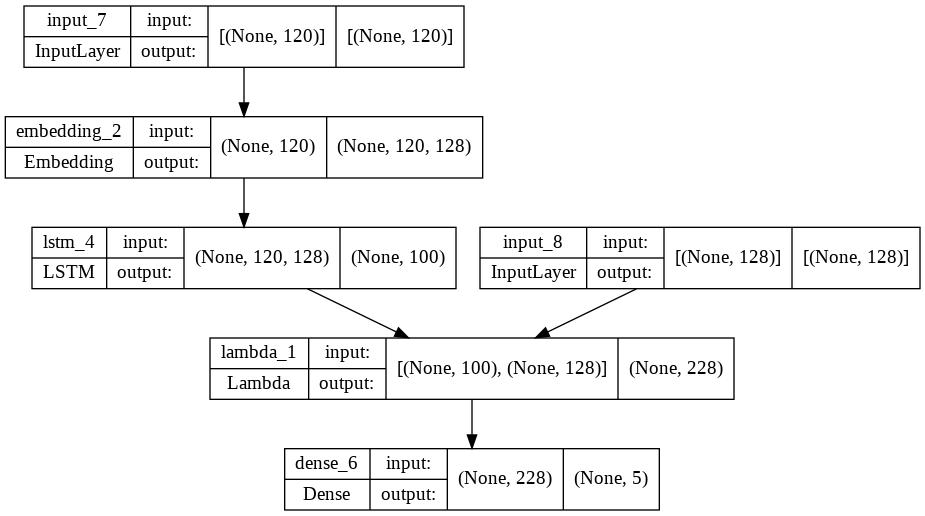

In [138]:
tf.keras.utils.plot_model(
    modelEmbedAndTfExpandLSTM,
    to_file='LSTM then concat with TFIDF.jpg',
    dpi=96,
    show_shapes=True,
    show_layer_names=True
)

SVD + Dense

In [70]:
tfidf = TfidfVectorizer(stop_words='english',max_features=embedding_dim+10)

In [71]:
X_trainTfIdf = tfidf.fit_transform(X_trainNotTokenized)

In [72]:
X_testTfIdf = tfidf.transform(X_testNotTokenized)

In [73]:
X_trainTfIdf = X_trainTfIdf.todense()

In [74]:
X_testTfIdf = X_testTfIdf.todense()

In [75]:
X_testTfIdf.shape

(445, 138)

In [76]:
svd = TruncatedSVD(n_components=embedding_dim)

In [77]:
X_trainSVD = svd.fit_transform(X_trainTfIdf)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:598: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  FutureWarning,


In [78]:
np.cumsum(svd.explained_variance_ratio_)

array([0.0093513 , 0.05721432, 0.09376233, 0.12852561, 0.15638865,
       0.17786603, 0.19693192, 0.21557464, 0.2328893 , 0.24887582,
       0.2643785 , 0.27962119, 0.29455674, 0.30882594, 0.32247118,
       0.33569576, 0.34846231, 0.36117114, 0.3729746 , 0.38446707,
       0.39545336, 0.40628359, 0.41684079, 0.42721918, 0.43732377,
       0.44720214, 0.45681277, 0.46630032, 0.47557658, 0.48470239,
       0.49375543, 0.50251604, 0.51113032, 0.51957469, 0.52796533,
       0.53624793, 0.54439834, 0.55252051, 0.56040346, 0.56814604,
       0.57583836, 0.58330931, 0.59072578, 0.59798483, 0.60512764,
       0.6121444 , 0.61903014, 0.6258263 , 0.63259086, 0.63924464,
       0.6458635 , 0.65230805, 0.65870638, 0.66507425, 0.67130828,
       0.67745984, 0.68352136, 0.6895019 , 0.69544096, 0.70129003,
       0.70704771, 0.71275129, 0.71843815, 0.72394879, 0.7293939 ,
       0.73482855, 0.74022431, 0.74550395, 0.75076294, 0.75599104,
       0.76117841, 0.76631769, 0.77140055, 0.77642543, 0.78135

In [79]:
X_testSVD = svd.fit_transform(X_testTfIdf)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:598: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  FutureWarning,


In [81]:
X_trainSVD

array([[ 0.26212262, -0.22086162,  0.25321796, ...,  0.01991413,
        -0.01423255, -0.03713882],
       [ 0.35551202, -0.01016072, -0.22495587, ...,  0.07431088,
        -0.07243731,  0.08681393],
       [ 0.36795456,  0.30694983,  0.18088289, ..., -0.03383225,
        -0.04280048, -0.0058527 ],
       ...,
       [ 0.33426513,  0.13348514,  0.15850428, ...,  0.00170046,
        -0.00903799, -0.00327908],
       [ 0.35085994, -0.1679271 , -0.07340794, ...,  0.03844637,
        -0.00599779, -0.07493293],
       [ 0.47544052,  0.05800428, -0.23694586, ...,  0.01863703,
         0.00492189, -0.00868243]])

In [87]:
modelSvd = Sequential([
    Input(shape=(128)),
    Dense(128),
    Dense(5,activation='softmax')
])
modelSvd.compile(
    optimizer='Adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)
modelSvd.fit(
    X_trainSVD,
    y_train,
    epochs=50,
    batch_size=32,
    validation_data=(X_testSVD,y_test)
)

Epoch 1/50
56/56 [==============================] - 1s 8ms/step - loss: 1.4543 - accuracy: 0.5584 - val_loss: 1.8285 - val_accuracy: 0.0742
Epoch 2/50
56/56 [==============================] - 0s 5ms/step - loss: 1.1185 - accuracy: 0.8466 - val_loss: 2.1687 - val_accuracy: 0.0539
Epoch 3/50
56/56 [==============================] - 0s 5ms/step - loss: 0.7814 - accuracy: 0.9062 - val_loss: 2.6776 - val_accuracy: 0.0629
Epoch 4/50
56/56 [==============================] - 0s 5ms/step - loss: 0.5295 - accuracy: 0.9230 - val_loss: 3.2459 - val_accuracy: 0.0629
Epoch 5/50
56/56 [==============================] - 0s 5ms/step - loss: 0.3853 - accuracy: 0.9287 - val_loss: 3.7732 - val_accuracy: 0.0562
Epoch 6/50
56/56 [==============================] - 0s 5ms/step - loss: 0.3057 - accuracy: 0.9388 - val_loss: 4.2181 - val_accuracy: 0.0539
Epoch 7/50
56/56 [==============================] - 0s 3ms/step - loss: 0.2581 - accuracy: 0.9416 - val_loss: 4.6265 - val_accuracy: 0.0539
Epoch 8/50
56/56 [==

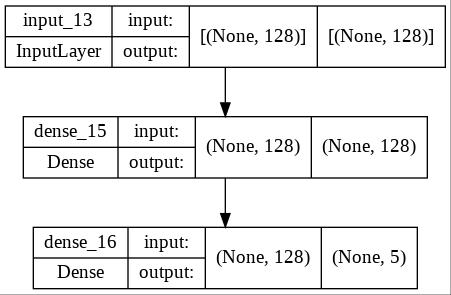

In [140]:
tf.keras.utils.plot_model(
    modelSvd,
    to_file='SVD + Dense.jpg',
    dpi=96,
    show_shapes=True,
    show_layer_names=True
)

SVD + LSTM but only 1 step

In [88]:
X_trainSVD1LSTM = tf.expand_dims(X_trainSVD,axis=1)
X_testSVD1LSTM = tf.expand_dims(X_testSVD,axis=1)

In [93]:
modelSVD1LSTM = Sequential([
    Input(shape=(1,128)),
    LSTM(100),
    Dense(5,activation='softmax')
])
modelSVD1LSTM.compile(
    optimizer='Adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)
modelSVD1LSTM.fit(
    X_trainSVD1LSTM,
    y_train,
    epochs=50,
    batch_size=32,
    validation_data=(X_testSVD1LSTM,y_test)
)

Epoch 1/50
56/56 [==============================] - 3s 20ms/step - loss: 1.5775 - accuracy: 0.5051 - val_loss: 1.6411 - val_accuracy: 0.1056
Epoch 2/50
56/56 [==============================] - 0s 8ms/step - loss: 1.4773 - accuracy: 0.7573 - val_loss: 1.7141 - val_accuracy: 0.1101
Epoch 3/50
56/56 [==============================] - 0s 7ms/step - loss: 1.2926 - accuracy: 0.8275 - val_loss: 1.8823 - val_accuracy: 0.0831
Epoch 4/50
56/56 [==============================] - 0s 7ms/step - loss: 1.0066 - accuracy: 0.8994 - val_loss: 2.1963 - val_accuracy: 0.0787
Epoch 5/50
56/56 [==============================] - 0s 7ms/step - loss: 0.7025 - accuracy: 0.9140 - val_loss: 2.6463 - val_accuracy: 0.0719
Epoch 6/50
56/56 [==============================] - 0s 7ms/step - loss: 0.4866 - accuracy: 0.9315 - val_loss: 3.1431 - val_accuracy: 0.0674
Epoch 7/50
56/56 [==============================] - 0s 7ms/step - loss: 0.3623 - accuracy: 0.9331 - val_loss: 3.5954 - val_accuracy: 0.0607
Epoch 8/50
56/56 [=

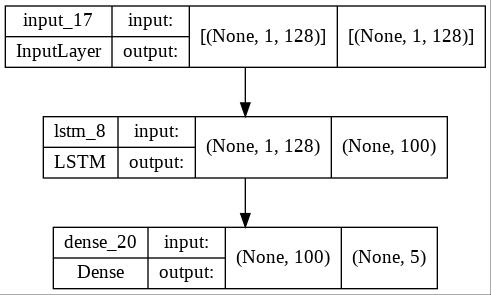

In [141]:
tf.keras.utils.plot_model(
    modelSVD1LSTM,
    to_file='SVD + LSTM but only 1 step.jpg',
    dpi=96,
    show_shapes=True,
    show_layer_names=True
)

SVD + LSTM with many step

In [94]:
X_trainSVDManyLSTM = tf.expand_dims(X_trainSVD,axis=-1)
X_testSVDManyLSTM = tf.expand_dims(X_testSVD,axis=-1)

In [117]:
modelSVDManyLSTM = Sequential([
    Input(shape=(128,1)),
    LSTM(100),
    Dense(5,activation='softmax')
])
modelSVDManyLSTM.compile(
    optimizer='Adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)
modelSVDManyLSTM.fit(
    X_trainSVDManyLSTM,
    y_train,
    epochs=50,
    batch_size=32,
    validation_data=(X_testSVDManyLSTM,y_test)
)

Epoch 1/50
56/56 [==============================] - 2s 18ms/step - loss: 1.6067 - accuracy: 0.2152 - val_loss: 1.6030 - val_accuracy: 0.2180
Epoch 2/50
56/56 [==============================] - 0s 8ms/step - loss: 1.6036 - accuracy: 0.2320 - val_loss: 1.6030 - val_accuracy: 0.2180
Epoch 3/50
56/56 [==============================] - 0s 8ms/step - loss: 1.6033 - accuracy: 0.2320 - val_loss: 1.6032 - val_accuracy: 0.2180
Epoch 4/50
56/56 [==============================] - 0s 8ms/step - loss: 1.6039 - accuracy: 0.2225 - val_loss: 1.6020 - val_accuracy: 0.2180
Epoch 5/50
56/56 [==============================] - 0s 8ms/step - loss: 1.6034 - accuracy: 0.2208 - val_loss: 1.6018 - val_accuracy: 0.2180
Epoch 6/50
56/56 [==============================] - 0s 8ms/step - loss: 1.6031 - accuracy: 0.2157 - val_loss: 1.6016 - val_accuracy: 0.2180
Epoch 7/50
56/56 [==============================] - 0s 8ms/step - loss: 1.6030 - accuracy: 0.2320 - val_loss: 1.6018 - val_accuracy: 0.2180
Epoch 8/50
56/56 [=

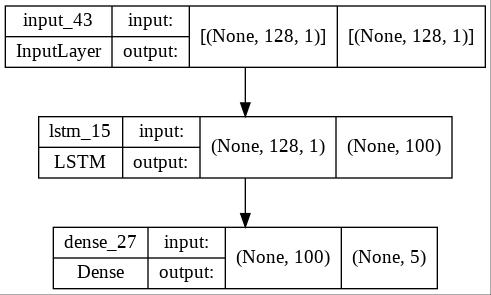

In [143]:
tf.keras.utils.plot_model(
    modelSVDManyLSTM,
    to_file='SVD + LSTM with many step.jpg',
    dpi=96,
    show_shapes=True,
    show_layer_names=True
)

Embedding concat svd then feed to LSTM

In [115]:
inputTokenizerSVD = Input(shape=(maxlen))
inputTfIdf = Input(shape=(embedding_dim))
embed = Embedding(vocab_size,embedding_dim,mask_zero=True,input_length=maxlen)(inputTokenizerSVD)
lambdalayer = Lambda(lambda x : tf.concat([x[0],tf.expand_dims(x[1],axis=1)],axis=1))([embed,inputTfIdf])
lstm = LSTM(100)(lambdalayer)
out = Dense(5,activation='sigmoid')(lstm)
modelEmbedSvd = Model(inputs=[inputTokenizerSVD,inputTfIdf],outputs=out)
modelEmbedSvd.compile(
    optimizer = 'Adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)
modelEmbedSvd.fit(
    [X_trainPad,X_trainSVD],
    y_train,
    epochs=50,
    batch_size = 32,
    validation_data=([X_testPad,X_testSVD],y_test)
)

Epoch 1/50
56/56 [==============================] - 5s 28ms/step - loss: 1.5520 - accuracy: 0.3461 - val_loss: 1.5813 - val_accuracy: 0.2225
Epoch 2/50
56/56 [==============================] - 1s 13ms/step - loss: 1.1032 - accuracy: 0.6045 - val_loss: 1.0006 - val_accuracy: 0.5101
Epoch 3/50
56/56 [==============================] - 1s 13ms/step - loss: 0.8487 - accuracy: 0.7140 - val_loss: 1.2572 - val_accuracy: 0.4607
Epoch 4/50
56/56 [==============================] - 1s 13ms/step - loss: 0.6869 - accuracy: 0.7438 - val_loss: 0.7965 - val_accuracy: 0.6202
Epoch 5/50
56/56 [==============================] - 1s 14ms/step - loss: 0.4777 - accuracy: 0.8539 - val_loss: 0.7535 - val_accuracy: 0.7213
Epoch 6/50
56/56 [==============================] - 1s 13ms/step - loss: 0.2581 - accuracy: 0.9331 - val_loss: 0.8481 - val_accuracy: 0.7730
Epoch 7/50
56/56 [==============================] - 1s 12ms/step - loss: 0.3089 - accuracy: 0.9185 - val_loss: 0.5961 - val_accuracy: 0.7843
Epoch 8/50
56

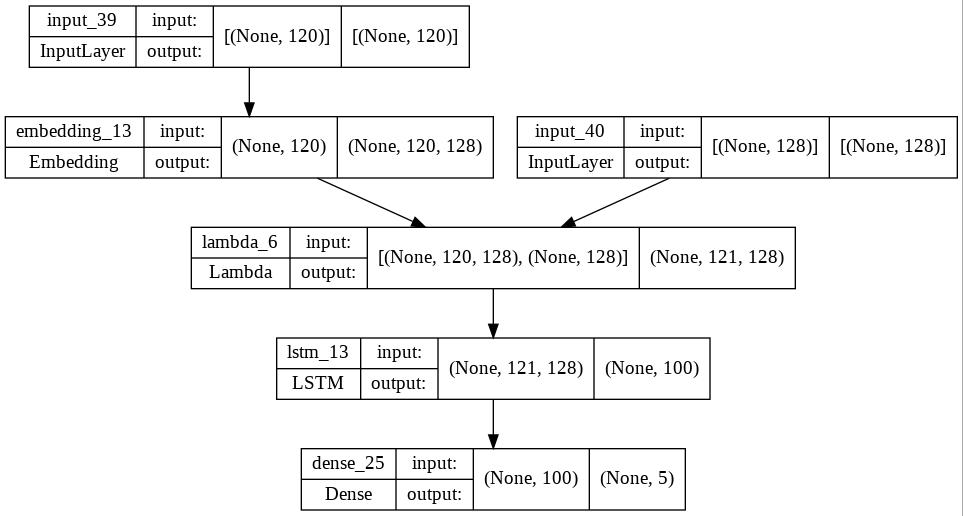

In [145]:
tf.keras.utils.plot_model(
    modelEmbedSvd,
    to_file='Embedding concat svd then feed to LSTM.jpg',
    dpi=96,
    show_shapes=True,
    show_layer_names=True
)

embedding + tfidf concat with lstm output

In [116]:
inputTokenizerSVD = Input(shape=(maxlen))
inputTfIdf = Input(shape=(embedding_dim))
embed = Embedding(vocab_size,embedding_dim,mask_zero=True,input_length=maxlen)(inputTokenizerSVD)
lstm = LSTM(100)(embed)
lambdaLayer = Lambda(lambda x: tf.concat([x[0],x[1]],1))([lstm,inputTfIdf])
out = Dense(5,activation='sigmoid')(lambdaLayer)
modelEmbedSvdLSTM = Model(inputs=[inputTokenizerSVD,inputTfIdf],outputs=out)
modelEmbedSvdLSTM.compile(
    optimizer = 'Adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)
modelEmbedSvdLSTM.fit(
    [X_trainPad,X_trainSVD],
    y_train,
    epochs=50,
    batch_size = 32,
    validation_data=([X_testPad,X_testSVD],y_test)
)

Epoch 1/50
56/56 [==============================] - 9s 47ms/step - loss: 1.5459 - accuracy: 0.3067 - val_loss: 1.4911 - val_accuracy: 0.2899
Epoch 2/50
56/56 [==============================] - 1s 12ms/step - loss: 1.4891 - accuracy: 0.4618 - val_loss: 1.3974 - val_accuracy: 0.3326
Epoch 3/50
56/56 [==============================] - 1s 12ms/step - loss: 1.3716 - accuracy: 0.4955 - val_loss: 1.8107 - val_accuracy: 0.2742
Epoch 4/50
56/56 [==============================] - 1s 12ms/step - loss: 1.3779 - accuracy: 0.6331 - val_loss: 1.4668 - val_accuracy: 0.3528
Epoch 5/50
56/56 [==============================] - 1s 11ms/step - loss: 1.0407 - accuracy: 0.6702 - val_loss: 1.1155 - val_accuracy: 0.5169
Epoch 6/50
56/56 [==============================] - 1s 12ms/step - loss: 0.9583 - accuracy: 0.6753 - val_loss: 1.2040 - val_accuracy: 0.4112
Epoch 7/50
56/56 [==============================] - 1s 12ms/step - loss: 0.7238 - accuracy: 0.8185 - val_loss: 0.6983 - val_accuracy: 0.7573
Epoch 8/50
56

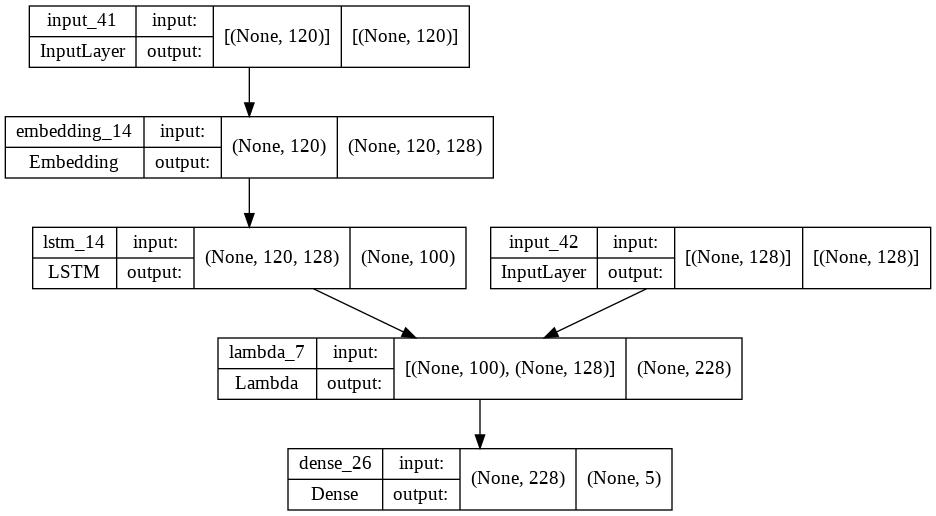

In [147]:
tf.keras.utils.plot_model(
    modelEmbedSvdLSTM,                    # here is the trick (for now)
    to_file='LSTM then concat with SVD.jpg', dpi=96,              # saving  
    show_shapes=True, show_layer_names=True,  # show shapes and layer name
    expand_nested=False                       # will show nested block
)